Step 1: Load the Dataset


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif

# Load the final merged dataset
file_path = 'data/final_customer_data_12.csv'
final_df = pd.read_csv(file_path)


Step 2: Data Integrity Checks


In [25]:
# Check for duplicate entries
print("Checking for duplicate entries...")
duplicates = final_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
final_df = final_df.drop_duplicates()

# Check for missing values
print("\nChecking for missing values...")
missing_values = final_df.isnull().sum()
print(missing_values[missing_values > 0])

# Validate customer transactions against social profiles
if 'customer_id_new' in final_df.columns:
    valid_customers = final_df['customer_id_new'].nunique()
    print(f"Unique valid customers: {valid_customers}")


Checking for duplicate entries...
Number of duplicate rows: 0

Checking for missing values...
customer_id_new             1
social_media_platform      12
purchase_interest_score    12
review_sentiment           12
dtype: int64
Unique valid customers: 66


Step 3: Statistical Summarization


Generating summary statistics...
       customer_id_legacy  transaction_id  purchase_amount  customer_rating  \
count           67.000000       67.000000        67.000000        67.000000   
mean           155.223881     1039.776119       271.761918         3.140682   
std             27.468892       36.374242       111.064148         1.143778   
min            103.000000     1001.000000        61.407674         1.044554   
25%            130.500000     1013.500000       190.394233         2.191769   
50%            157.000000     1027.000000       279.137726         3.270815   
75%            181.000000     1054.500000       365.404713         4.015098   
max            199.000000     1133.000000       494.231987         4.930606   

       engagement_score  purchase_interest_score  
count         67.000000                55.000000  
mean         164.095360                 3.161818  
std           66.649212                 1.179845  
min           36.844604                 1.000000  

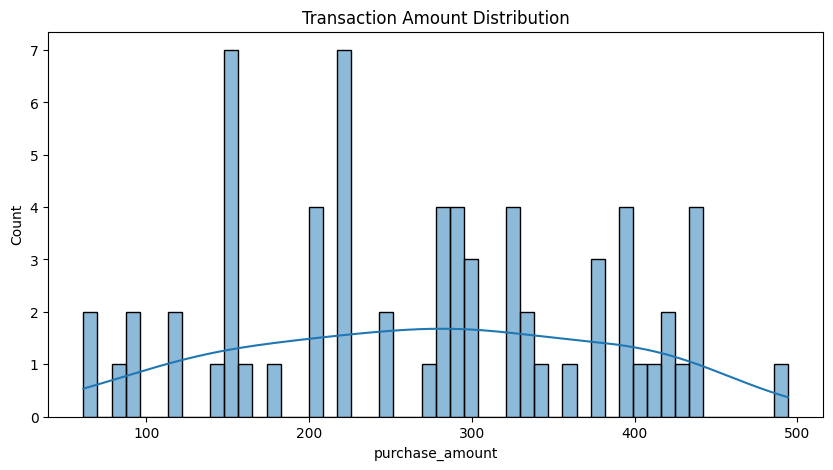

In [26]:
# Generate summary statistics
print("\nGenerating summary statistics...")
print(final_df.describe())

# Visualize transaction amount distribution
plt.figure(figsize=(10, 5))
sns.histplot(final_df['purchase_amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()


Step 4: Feature Selection

In [27]:
from sklearn.impute import SimpleImputer

# Ensure only numeric columns are used
numeric_df = final_df.select_dtypes(include=['number'])

# Handle missing values
imputer = SimpleImputer(strategy='mean')  # You can change to 'median' or 'most_frequent'
X = numeric_df.drop(columns=['purchase_amount'], errors='ignore')  # Drop target variable
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)  # Impute missing values

y = final_df['purchase_amount'].dropna()  # Ensure target variable has no NaN values

# Select the top 10 most important features
selector = SelectKBest(score_func=f_classif, k=min(10, X.shape[1]))  
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("\nTop 10 Selected Features:")
print(selected_features.tolist())



Top 10 Selected Features:
['customer_id_legacy', 'transaction_id', 'customer_rating', 'engagement_score', 'purchase_interest_score']


c:\Users\thinkBIG\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


Step 5: Save the Final Cleaned Dataset

In [3]:
# Define output file name
output_file = 'data/final_dataset_ready_group12.csv' 
# Save the final cleaned dataset
final_df.to_csv(output_file, index=False)

print(f"\n✅ Final cleaned dataset saved as: {output_file}")



✅ Final cleaned dataset saved as: data/final_dataset_ready_group12.csv
